<a href="https://colab.research.google.com/github/StanleyLiangYork/NLP_deepLearning/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O ./bbc-text.csv

import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


--2020-06-28 14:04:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘./bbc-text.csv’

./bbc-text.csv      100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-06-28 14:04:43 (153 MB/s) - ‘./bbc-text.csv’ saved [5057493/5057493]



In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [ ]:
sentences = []
labels = []
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " " # a word with two blank spaces on eacch side
            sentence = sentence.replace(token, " ") # replace stop words by black space
            sentence = sentence.replace("  ", " ") # fix the double blank space
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
print(f'items in the dataset {len(sentences)}')
for i in range(5):
  print(f'sentences: {sentences[i]}')

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [ ]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [ ]:
import numpy as np

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

label_index = label_tokenizer.word_index

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)
print(label_index)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

label = np.zeros((2226,6))

for i,l in enumerate(labels):
  idx = label_word_index[l]
  label[i][idx-1] = 1

In [ ]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(padded, label, test_size=0.2, random_state=10)

training_sentences = np.array(training_sentences)
training_labels = np.array(training_labels)
testing_sentences = np.array(testing_sentences)
testing_labels = np.array(testing_labels)

In [ ]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

Epoch 1/30
56/56 [==============================] - 1s 9ms/step - loss: 1.7627 - accuracy: 0.3444 - val_loss: 1.7202 - val_accuracy: 0.2876
Epoch 2/30
56/56 [==============================] - 0s 8ms/step - loss: 1.6602 - accuracy: 0.3045 - val_loss: 1.5853 - val_accuracy: 0.3955
Epoch 3/30
56/56 [==============================] - 0s 7ms/step - loss: 1.4686 - accuracy: 0.4579 - val_loss: 1.3657 - val_accuracy: 0.6247
Epoch 4/30
56/56 [==============================] - 0s 8ms/step - loss: 1.1851 - accuracy: 0.7730 - val_loss: 1.0921 - val_accuracy: 0.8157
Epoch 5/30
56/56 [==============================] - 0s 7ms/step - loss: 0.8839 - accuracy: 0.9242 - val_loss: 0.8312 - val_accuracy: 0.8989
Epoch 6/30
56/56 [==============================] - 0s 7ms/step - loss: 0.6228 - accuracy: 0.9657 - val_loss: 0.6286 - val_accuracy: 0.9124
Epoch 7/30
56/56 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.9736 - val_loss: 0.4916 - val_accuracy: 0.9191
Epoch 8/30
56/56 [==

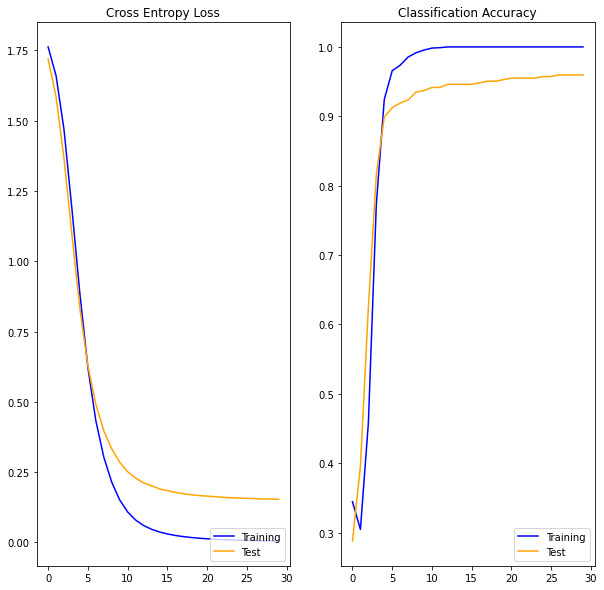

14/14 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9596


[0.1532571166753769, 0.9595505595207214]

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

def summarize_diagnostics(history):
  plt.figure(figsize=(10, 10))
  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], color='blue', label='Training')
  plt.plot(history.history['val_loss'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Cross Entropy Loss')
  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], color='blue', label='Training')
  plt.plot(history.history['val_accuracy'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Classification Accuracy')
  plt.show()

summarize_diagnostics(history)
model.evaluate(validation_padded, validation_label_seq)

In [ ]:
# !pip install -q tensorflow_datasets
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


load the data into a list

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
for i in range(2):
  print(training_sentences[i])
  print("positive") if training_labels[i] == 1 else print("negative")

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
negative
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot develo

In [ ]:
import numpy as np

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print(training_labels_final.shape, testing_labels_final.shape)

(25000,) (25000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4937 - accuracy: 0.7416 - val_loss: 0.3421 - val_accuracy: 0.8525
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2399 - accuracy: 0.9077 - val_loss: 0.3625 - val_accuracy: 0.8418
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0961 - accuracy: 0.9734 - val_loss: 0.4512 - val_accuracy: 0.8272
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0235 - accuracy: 0.9971 - val_loss: 0.5302 - val_accuracy: 0.8263
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0059 - accuracy: 0.9995 - val_loss: 0.5973 - val_accuracy: 0.8260
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6530 - val_accuracy: 0.8278
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 8.8052e-04 - accuracy: 1.0000 - val_loss: 0.6914 - val_accuracy: 0.8293
Ep

782/782 [==============================] - 2s 2ms/step - loss: 0.8052 - accuracy: 0.8293


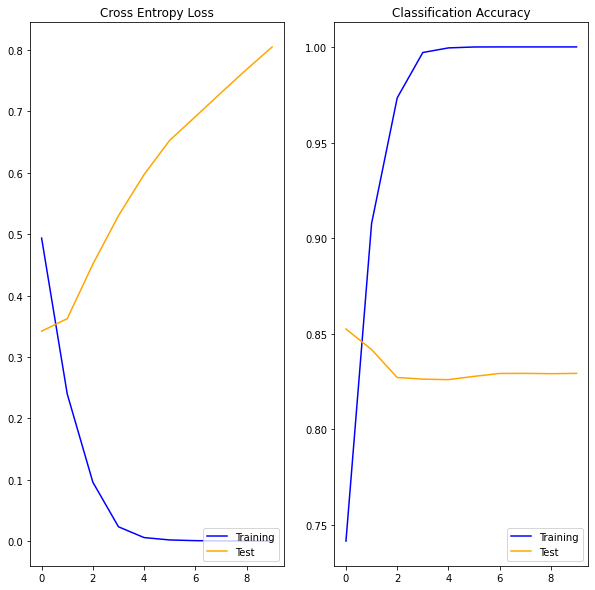

In [ ]:
model.evaluate(testing_padded, testing_labels_final)
summarize_diagnostics(history)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
    # if the value pointed by the key does not exist, return ?

print(decode_review(padded[0]))
print(training_sentences[0])

? ? b this was an absolutely terrible movie don't be <OOV> in by <OOV> <OOV> or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not <OOV> this <OOV> ridiculous storyline this movie is an early <OOV> us <OOV> piece the most <OOV> scenes were those when the <OOV> <OOV> were making their <OOV> for <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> and her <OOV> love <OOV> with <OOV> was nothing but a <OOV> emotional <OOV> in a movie that was <OOV> of any real <OOV> i am disappointed that there are movies like this <OOV> <OOV> like <OOV> <OOV> good name i could <OOV> sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbia

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n") # the word in the sequence
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n") # corresponding weight in the embedding
out_v.close()
out_m.close()

In [ ]:
from google.colab import files

files.download('vecs.tsv')
files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 68, 105, 12, 7, 491, 1216]]


Classify the sarcasm dataset

In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000
embedding_dim = 32
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ./sarcasm.json

--2020-07-01 13:35:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘./sarcasm.json’

./sarcasm.json      100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-07-01 13:35:01 (107 MB/s) - ‘./sarcasm.json’ saved [5643545/5643545]



In [3]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(training_sentences[0:5])
print(training_labels[0:5])

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way']
[0, 0, 1, 1, 0]


In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           640000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 640,817
Trainable params: 640,817
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6789 - accuracy: 0.5626 - val_loss: 0.6523 - val_accuracy: 0.6059
Epoch 2/30
625/625 - 4s - loss: 0.4981 - accuracy: 0.7914 - val_loss: 0.4126 - val_accuracy: 0.8214
Epoch 3/30
625/625 - 4s - loss: 0.3250 - accuracy: 0.8695 - val_loss: 0.3655 - val_accuracy: 0.8420
Epoch 4/30
625/625 - 4s - loss: 0.2639 - accuracy: 0.8970 - val_loss: 0.3434 - val_accuracy: 0.8542
Epoch 5/30
625/625 - 4s - loss: 0.2187 - accuracy: 0.9184 - val_loss: 0.3377 - val_accuracy: 0.8565
Epoch 6/30
625/625 - 4s - loss: 0.1855 - accuracy: 0.9315 - val_loss: 0.3421 - val_accuracy: 0.8559
Epoch 7/30
625/625 - 4s - loss: 0.1556 - accuracy: 0.9448 - val_loss: 0.3506 - val_accuracy: 0.8584
Epoch 8/30
625/625 - 4s - loss: 0.1333 - accuracy: 0.9545 - val_loss: 0.3667 - val_accuracy: 0.8563
Epoch 9/30
625/625 - 4s - loss: 0.1157 - accuracy: 0.9613 - val_loss: 0.4168 - val_accuracy: 0.8399
Epoch 10/30
625/625 - 4s - loss: 0.0989 - accuracy: 0.9685 - val_loss: 0.3970 - val_accuracy: 0.8575

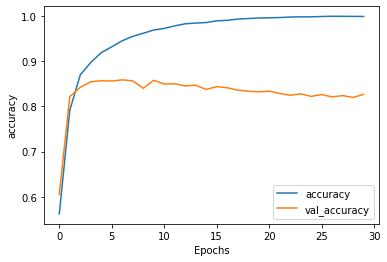

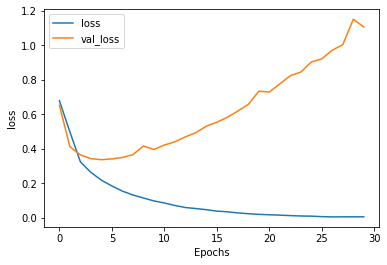

In [37]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [42]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 128)          49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_10 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 732,465
Trainable params: 732,465
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 50
history = model_lstm.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 26s 41ms/step - loss: 0.3967 - accuracy: 0.8083 - val_loss: 0.3263 - val_accuracy: 0.8565
Epoch 2/50
625/625 [==============================] - 24s 39ms/step - loss: 0.1697 - accuracy: 0.9336 - val_loss: 0.3756 - val_accuracy: 0.8545
Epoch 3/50
625/625 [==============================] - 24s 38ms/step - loss: 0.0966 - accuracy: 0.9690 - val_loss: 0.4381 - val_accuracy: 0.8502
Epoch 4/50
625/625 [==============================] - 24s 39ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.6137 - val_accuracy: 0.8422
Epoch 5/50
625/625 [==============================] - 24s 39ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.7065 - val_accuracy: 0.8430
Epoch 6/50
625/625 [==============================] - 24s 39ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.7933 - val_accuracy: 0.8417
Epoch 7/50
625/625 [==============================] - 24s 39ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.9484 - val_accuracy:

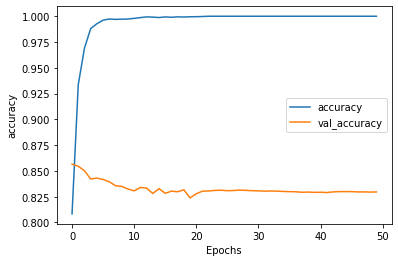

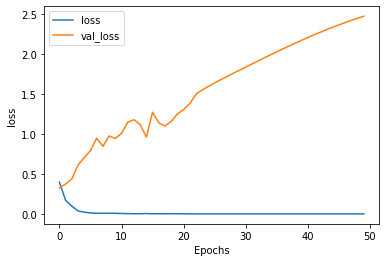

In [44]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [7]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          20608     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 663,729
Trainable params: 663,729
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 50
history = model_cnn.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Epoch 1/50
625/625 [==============================] - 6s 10ms/step - loss: 0.4363 - accuracy: 0.7846 - val_loss: 0.3472 - val_accuracy: 0.8496
Epoch 2/50
625/625 [==============================] - 6s 9ms/step - loss: 0.1829 - accuracy: 0.9309 - val_loss: 0.3626 - val_accuracy: 0.8542
Epoch 3/50
625/625 [==============================] - 6s 9ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.5072 - val_accuracy: 0.8426
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.6734 - val_accuracy: 0.8408
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.7509 - val_accuracy: 0.8442
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 4.2074e-04 - accuracy: 1.0000 - val_loss: 0.8111 - val_accuracy: 0.8436
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 1.5824e-04 - accuracy: 1.0000 - val_loss: 0.8474 - val_accuracy: 0.8

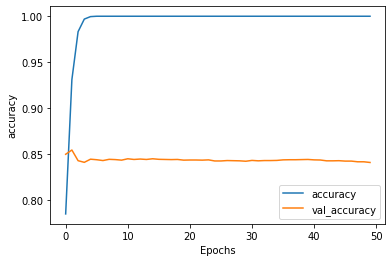

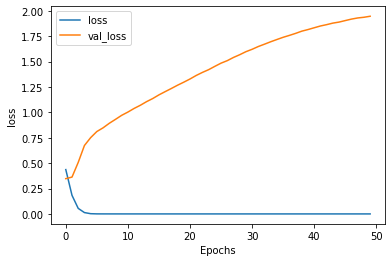

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(20000, 32)


In [ ]:
import numpy as np

sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
label=['non-sarcasm', 'sarcasm']
pred = model.predict(padded)
y_hat = np.argmax(pred)
label[y_hat]


'non-sarcasm'

Classify the IMDB dataset with subword encoding

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNF65A8/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNF65A8/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNF65A8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

tokenizer = info.features['text'].encoder

In [ ]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
import tensorflow as tf

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.6709 - accuracy: 0.6196 - val_loss: 0.6170 - val_accuracy: 0.6996
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 0.5041 - accuracy: 0.8050 - val_loss: 0.4308 - val_accuracy: 0.8412
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 0.3553 - accuracy: 0.8760 - val_loss: 0.3516 - val_accuracy: 0.8678
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2870 - accuracy: 0.8970 - val_loss: 0.3247 - val_accuracy: 0.8726
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2501 - accuracy: 0.9096 - val_loss: 0.3116 - val_accuracy: 0.8788
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2232 - accuracy: 0.9189 - val_loss: 0.3363 - val_accuracy: 0.8603
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2042 - accuracy: 0.9266 - val_loss: 0.3068 - val_accuracy:

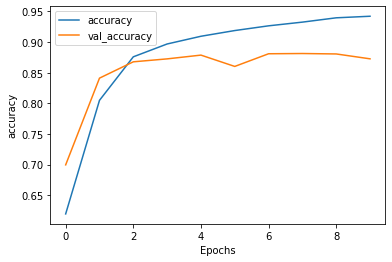

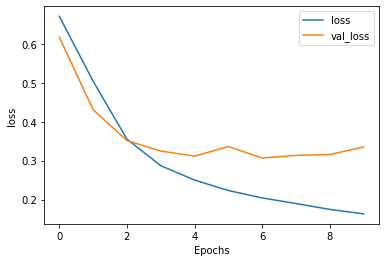

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Add a single LTSM layer

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ONWL1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ONWL1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ONWL1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

Single layer LSTM model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 72s 183ms/step - loss: 0.5530 - accuracy: 0.7093 - val_loss: 0.6884 - val_accuracy: 0.5909
Epoch 2/10
391/391 [==============================] - 72s 184ms/step - loss: 0.6487 - accuracy: 0.6380 - val_loss: 0.9861 - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 73s 186ms/step - loss: 0.5635 - accuracy: 0.7084 - val_loss: 0.4521 - val_accuracy: 0.7981
Epoch 4/10
391/391 [==============================] - 73s 188ms/step - loss: 0.3263 - accuracy: 0.8683 - val_loss: 0.4403 - val_accuracy: 0.7895
Epoch 5/10
391/391 [==============================] - 72s 185ms/step - loss: 0.2562 - accuracy: 0.9026 - val_loss: 0.3945 - val_accuracy: 0.8412
Epoch 6/10
391/391 [==============================] - 73s 186ms/step - loss: 0.2063 - accuracy: 0.9238 - val_loss: 0.4189 - val_accuracy: 0.8384
Epoch 7/10
391/391 [==============================] - 72s 185ms/step - loss: 0.1545 - accuracy: 0.9450 - val_loss: 0.4935 - val_ac

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

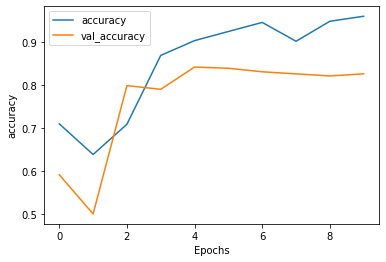

In [11]:
plot_graphs(history, 'accuracy')

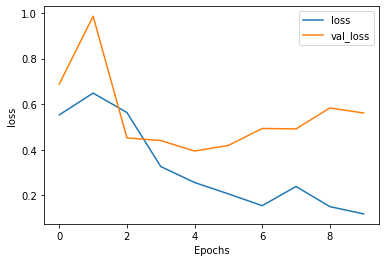

In [12]:
plot_graphs(history, 'loss')

Multiple layer LSTM

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model_2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 127s 326ms/step - loss: 0.5734 - accuracy: 0.6935 - val_loss: 0.9132 - val_accuracy: 0.5867
Epoch 2/10
391/391 [==============================] - 125s 321ms/step - loss: 0.4266 - accuracy: 0.8193 - val_loss: 0.4734 - val_accuracy: 0.7951
Epoch 3/10
391/391 [==============================] - 127s 325ms/step - loss: 0.4864 - accuracy: 0.7779 - val_loss: 0.5220 - val_accuracy: 0.7664
Epoch 4/10
391/391 [==============================] - 129s 331ms/step - loss: 0.3229 - accuracy: 0.8694 - val_loss: 0.4415 - val_accuracy: 0.8217
Epoch 5/10
391/391 [==============================] - 129s 331ms/step - loss: 0.2695 - accuracy: 0.8948 - val_loss: 0.3714 - val_accuracy: 0.8456
Epoch 6/10
391/391 [==============================] - 129s 330ms/step - loss: 0.2234 - accuracy: 0.9152 - val_loss: 0.3459 - val_accuracy: 0.8636
Epoch 7/10
391/391 [==============================] - 128s 328ms/step - loss: 0.1856 - accuracy: 0.9314 - val_loss: 0.3475 -

In [18]:
model_2.evaluate(test_dataset)

391/391 [==============================] - 37s 96ms/step - loss: 0.4636 - accuracy: 0.8621


[0.46361374855041504, 0.8620799779891968]

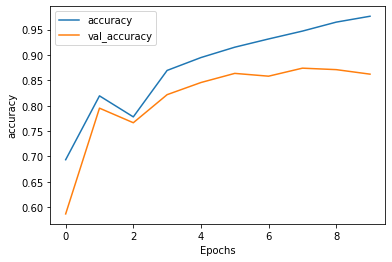

In [19]:
plot_graphs(history, 'accuracy')

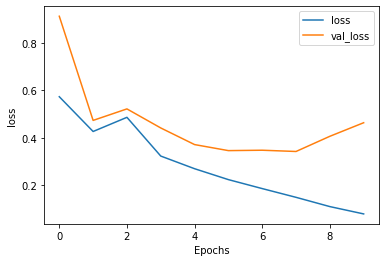

In [20]:
plot_graphs(history, 'loss')

1D convolutional layer

In [14]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model_cnn.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 35ms/step - loss: 0.4430 - accuracy: 0.7803 - val_loss: 0.3045 - val_accuracy: 0.8767
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2220 - accuracy: 0.9164 - val_loss: 0.3073 - val_accuracy: 0.8725
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 0.1687 - accuracy: 0.9380 - val_loss: 0.3329 - val_accuracy: 0.8733
Epoch 4/10
391/391 [==============================] - 13s 34ms/step - loss: 0.1375 - accuracy: 0.9500 - val_loss: 0.3690 - val_accuracy: 0.8678
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 0.1103 - accuracy: 0.9623 - val_loss: 0.4327 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0874 - accuracy: 0.9720 - val_loss: 0.5247 - val_accuracy: 0.8561
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 0.0760 - accuracy: 0.9754 - val_loss: 0.5695 - val_accuracy:

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

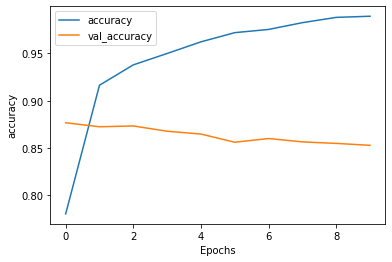

In [19]:
plot_graphs(history, 'accuracy')

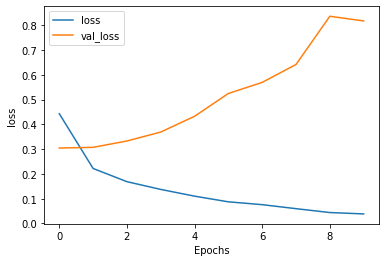

In [20]:
plot_graphs(history, 'loss')

GRU network

In [21]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                18816     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 546,881
Trainable params: 546,881
Non-trainable params: 0
_________________________________________________________________


In [25]:
NUM_EPOCHS = 10
history = model_gru.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 55s 141ms/step - loss: 0.5819 - accuracy: 0.6802 - val_loss: 0.4779 - val_accuracy: 0.7736
Epoch 2/10
391/391 [==============================] - 55s 140ms/step - loss: 0.3818 - accuracy: 0.8362 - val_loss: 0.4513 - val_accuracy: 0.7939
Epoch 3/10
391/391 [==============================] - 55s 141ms/step - loss: 0.2826 - accuracy: 0.8891 - val_loss: 0.3889 - val_accuracy: 0.8374
Epoch 4/10
391/391 [==============================] - 55s 141ms/step - loss: 0.2167 - accuracy: 0.9164 - val_loss: 0.4352 - val_accuracy: 0.8299
Epoch 5/10
391/391 [==============================] - 55s 141ms/step - loss: 0.1732 - accuracy: 0.9359 - val_loss: 0.4624 - val_accuracy: 0.8358
Epoch 6/10
391/391 [==============================] - 55s 141ms/step - loss: 0.1549 - accuracy: 0.9434 - val_loss: 0.4667 - val_accuracy: 0.8331
Epoch 7/10
391/391 [==============================] - 55s 141ms/step - loss: 0.1504 - accuracy: 0.9441 - val_loss: 0.5668 - val_ac

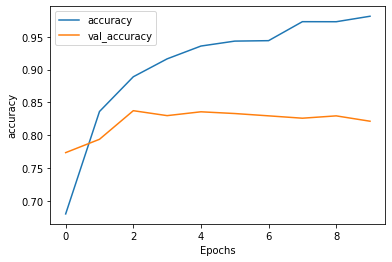

In [26]:
plot_graphs(history, 'accuracy')

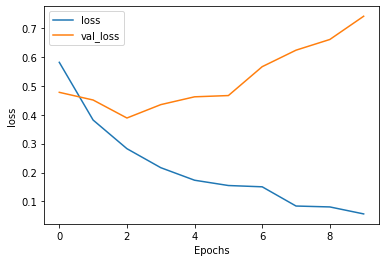

In [27]:
plot_graphs(history, 'loss')

In [1]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1

corpus = []

In [2]:
import os

if not os.path.exists('tweets_cleaned.csv'):
  !gsutil cp gs://pet-detect-239118/tweets_cleaned.csv ./tweets_cleaned.csv

num_sentences = 0

with open("tweets_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      list_item=[]
      list_item.append(row[5])
      this_label=row[0]
      if this_label=='0':
        list_item.append(0)
      else:
        list_item.append(1)
      num_sentences = num_sentences + 1
      corpus.append(list_item)


In [3]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [4]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [5]:
print(vocab_size)
print(word_index['i'])

138557
2


In [6]:
from zipfile import ZipFile
import os

if not os.path.exists('glove.6B.zip'):
  !gsutil cp gs://pet-detect-239118/glove.6B.zip ./glove.6B.zip
  # this glove vector has a 100 dim coefficient 

with ZipFile('./glove.6B.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [31]:
embeddings_index = {};
embedding_dim = 300
with open('glove.6B.300d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

In [32]:
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [33]:
print(embeddings_matrix.shape)

(138558, 300)


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 16, 300)           41567400  
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 300)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 64)            96064     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

In [37]:
num_epochs = 30

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

print("Training Complete")


Epoch 1/30
4500/4500 - 22s - loss: 0.5509 - accuracy: 0.7156 - val_loss: 0.5098 - val_accuracy: 0.7444
Epoch 2/30
4500/4500 - 22s - loss: 0.5065 - accuracy: 0.7486 - val_loss: 0.5183 - val_accuracy: 0.7402
Epoch 3/30
4500/4500 - 22s - loss: 0.4874 - accuracy: 0.7618 - val_loss: 0.4900 - val_accuracy: 0.7580
Epoch 4/30
4500/4500 - 22s - loss: 0.4720 - accuracy: 0.7709 - val_loss: 0.5044 - val_accuracy: 0.7563
Epoch 5/30
4500/4500 - 22s - loss: 0.4599 - accuracy: 0.7793 - val_loss: 0.4910 - val_accuracy: 0.7581
Epoch 6/30
4500/4500 - 22s - loss: 0.4515 - accuracy: 0.7835 - val_loss: 0.4974 - val_accuracy: 0.7632
Epoch 7/30
4500/4500 - 22s - loss: 0.4434 - accuracy: 0.7884 - val_loss: 0.4872 - val_accuracy: 0.7629
Epoch 8/30
4500/4500 - 22s - loss: 0.4355 - accuracy: 0.7948 - val_loss: 0.4968 - val_accuracy: 0.7616
Epoch 9/30
4500/4500 - 22s - loss: 0.4286 - accuracy: 0.7965 - val_loss: 0.5023 - val_accuracy: 0.7654
Epoch 10/30
4500/4500 - 22s - loss: 0.4252 - accuracy: 0.7995 - val_loss:

In [38]:
print("final evaluation")

model.evaluate(testing_padded, testing_labels)

final evaluation
500/500 [==============================] - 1s 3ms/step - loss: 0.5319 - accuracy: 0.7561


[0.5318615436553955, 0.7560625076293945]

<Figure size 432x288 with 0 Axes>

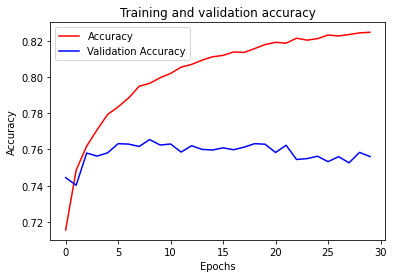

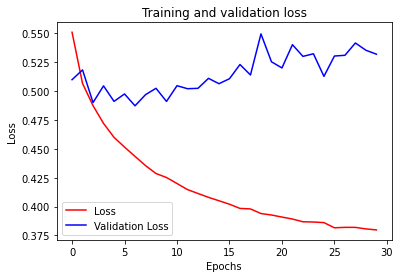

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()